In [2]:
import os
import re
import pandas as pd

In [3]:
# change working directory to the /Users/tildeidunsloth/Desktop/DatSci_25/DatSci_25/cleaned
os.chdir('/Users/tildeidunsloth/Desktop/DatSci_25/DatSci25/data/cleaned/')

In [4]:
# load in csv file with pandas
df = pd.read_csv('parliament_speeches.csv')

In [5]:
# show ten first rows
print(df.head(10))

# check length of dataframe
print(len(df))

# check how many rows for each unique year
print(df['year'].value_counts())

# show rows with year 2000
print(df[df['year'] == 2000])

   year  meeting_number                speaker  \
0  2013              45         Valgs Prøvelse   
1  2013              45         Valgs Prøvelse   
2  2013              45              Formanden   
3  2013              45              Formanden   
4  2013              45         Valgs Prøvelse   
5  2013              45  Forhandling Formanden   
6  2013              45   Afstemning Formanden   
7  2013              45         Valgs Prøvelse   
8  2013              45  Forhandling Formanden   
9  2013              45   Afstemning Formanden   

                                              speech  
0  Godkendelse af stedfortræder som midlertidigt ...  
1  Godkendelse af stedfortræder som repræsentant ...  
2  Mødet er åbnet. I dag er der følgende anmeldel...  
3  Anne Baastrup (SF) har søgt om orlov på grund ...  
4  Godkendelse af stedfortræder som midlertidigt ...  
5  Fra Udvalget til Valgs Prøvelse har jeg modtag...  
6  Jeg slutter afstemningen. Udvalgets indstillin...  
7  Godken

In [6]:
# remove klima- minister from the dataframe
pattern = r'\bklima(?:[-,][^,\n\r]*?)*? *og *[^,\n\r]*?minister(?:en)?\b'
df['speech'] = df['speech'].str.replace(pattern, '', flags=re.IGNORECASE, regex=True)


In [7]:
# make a subset of rows where the word "klima" appears in the speech
klima_df = df[df['speech'].str.contains('klima', case=False, na=False)]

In [8]:
print(len(klima_df))
print(klima_df.head(10))

16897
      year  meeting_number                                            speaker  \
229   2013              45                                Christian Juhl (EL)   
454   2013              51                       Lars Christian Lilleholt (V)   
456   2013              51                                          Theil (S)   
460   2013              51                             Andreas Steenberg (RV)   
462   2013              51                                    Steen Gade (SF)   
464   2013              51                                   Per Clausen (EL)   
468   2013              51  Klima Energi Og Bygningsministeren (Rasmus Hel...   
469   2013              51                                     (Bent Bøgsted)   
895   2013              86                          Christian Friis Bach (RV)   
1837  2013              92                  Miljøministeren (Kirsten Brosbøl)   

                                                 speech  
229   Jeg tror ikke, at de fleste arbejdere 

In [9]:
# extract parties

# list of valid party abbreviations
valid_parties = {
    "S", "V", "DD", "SF", "LA", "M", "KF", "EL", "DF", "RV", "ALT", 
    "BP", "N", "IA", "SP", "JF", "CD", "NB", "KRF", "FP"
}

# Function to extract and validate party abbreviation
def extract_party(speaker):
    match = re.search(r'\(([^()]+)\)', speaker)
    if match:
        party = match.group(1).strip()
        if party in valid_parties:
            return party
    return None

# Apply to dataframe
klima_df['party'] = klima_df['speaker'].apply(extract_party)



<ipython-input-9-643e1546f9fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klima_df['party'] = klima_df['speaker'].apply(extract_party)


In [36]:
# Count all mentions of "klima" (including as part of compound words)
klima_all_mentions_per_year = klima_df['speech'].str.count(r'\bklima\w*', flags=re.IGNORECASE).groupby(klima_df['year']).sum()
print(klima_all_mentions_per_year)


year
2000     246
2001     191
2002     325
2003     212
2004     162
2005      98
2006     584
2007    1349
2008    1502
2009    2716
2010     729
2011     466
2012     410
2013     905
2014     565
2015    1694
2016    1466
2017    1287
2018    2845
2019    3545
2020    3133
2021    3070
2022    3425
2023    2909
2024    2237
Name: speech, dtype: int64


In [33]:
# Count exact mentions of "klima" or "klimaet" (not part of longer words)
klimaet_count_per_year_exact = klima_df['speech'].str.count(r'\bklima(et)?\b', flags=re.IGNORECASE).groupby(klima_df['year']).sum()
print(klimaet_count_per_year_exact)

year
2000     77
2001     25
2002     45
2003     29
2004     45
2005     35
2006     81
2007    320
2008    401
2009    501
2010    176
2011    174
2012    114
2013    235
2014    163
2015    333
2016    271
2017    230
2018    448
2019    653
2020    653
2021    567
2022    754
2023    621
2024    414
Name: speech, dtype: int64


In [34]:
# Count compound words that start with "klima" but are not just "klima" or "klimaet"
compound_klima_count_per_year = klima_df['speech'].str.count(r'\bklima(?!et\b)[a-zæøå]+', flags=re.IGNORECASE).groupby(klima_df['year']).sum()
print(compound_klima_count_per_year)

year
2000     169
2001     166
2002     280
2003     183
2004     117
2005      63
2006     503
2007    1029
2008    1100
2009    2215
2010     553
2011     292
2012     296
2013     670
2014     402
2015    1361
2016    1195
2017    1056
2018    2397
2019    2892
2020    2480
2021    2503
2022    2671
2023    2287
2024    1823
Name: speech, dtype: int64


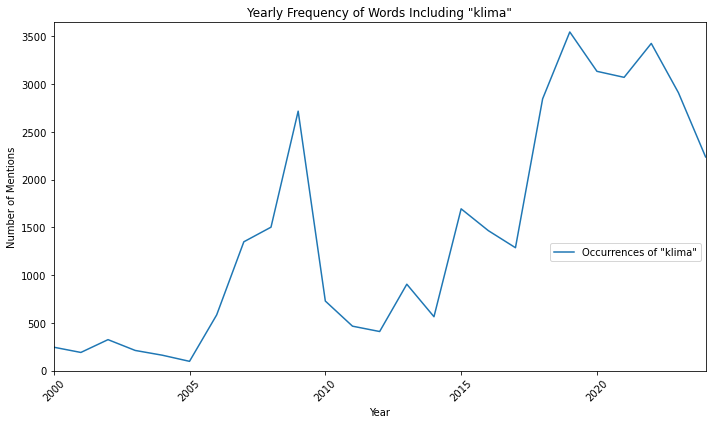

In [37]:
# plot klima mentions per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(klima_all_mentions_per_year.index, klima_all_mentions_per_year.values)
plt.title('Yearly Frequency of Words Including "klima"')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.xlim(klima_all_mentions_per_year.index.min(), klima_all_mentions_per_year.index.max())
plt.ylim(0, klima_all_mentions_per_year.max() + 100)
plt.legend(['Occurrences of "klima"'], loc='lower right', bbox_to_anchor=(1, 0.3))
plt.grid(False)
plt.tight_layout()
plt.savefig('klima_occurrences.png')

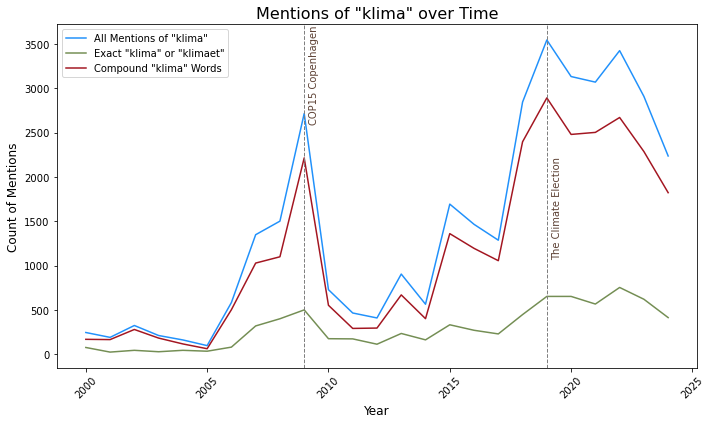

In [55]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(klima_all_mentions_per_year.index, klima_all_mentions_per_year.values, label='All Mentions of "klima"', color='#2191FB')
plt.plot(klimaet_count_per_year_exact.index, klimaet_count_per_year_exact.values, label='Exact "klima" or "klimaet"', color='#748E54')
plt.plot(compound_klima_count_per_year.index, compound_klima_count_per_year.values, label='Compound "klima" Words', color='#A31621')

# Add vertical lines and annotations
plt.axvline(x=2009, color='gray', linestyle='--', linewidth=1)
plt.text(2009 + 0.2, plt.ylim()[1], 'COP15 Copenhagen', rotation=90, verticalalignment='top', color='#5C4033')

plt.axvline(x=2019, color='gray', linestyle='--', linewidth=1)
plt.text(2019 + 0.2, plt.ylim()[1]*0.6, 'The Climate Election', rotation=90, verticalalignment='top', color='#5C4033')


# Customize the plot
plt.title('Mentions of "klima" over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Mentions', fontsize=12)
plt.legend()
plt.grid(False)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# save klima_df to a new csv file
klima_df.to_csv('klima_speeches.csv', index=False)